# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Giam Sigaud PART 1: 3 Observable trends:

1. From the Latitude vs Temperature plot: We can confirm that, the closer a city is to the equator, the hotter the temperature tends to get.

2. From the Northern Hemisphere - Max Temp vs. Latitude Linear Regression plot: Consistent with the 1st observable trend featured above, the temperature for the queried cities south of the equator, consistently climbed the closer they got to the equator.

3. From the Latitude vs Cloudiness plot: The wind speed of the cities queried in this data set were generally 8 mph or less.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [3]:
# Verifying Cities
city_weather = pd.DataFrame(cities, columns=['City'])
city_weather.head()

,City
0,upernavik
1,port alfred
2,crotone
3,komsomolskiy
4,kruisfontein


In [5]:
# Setting up DF
city_weather['Lat']=''
city_weather['Lng']=''
city_weather['Max Temp']=''
city_weather['Humidity']=''
city_weather['Cloudiness']=''
city_weather['Wind Speed']=''
city_weather['Country']=''
city_weather['Date']=''

city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,,,,,,,,
1,port alfred,,,,,,,,
2,crotone,,,,,,,,
3,komsomolskiy,,,,,,,,
4,kruisfontein,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [6]:
# Define Base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# building URL by adding Key and query (not query values - yet)
query_url = f"{base_url}appid={weather_api_key}&q=" 

print("Beginning Data Retrieval") 
print("-----------------------------") 

# Looping
count = 0
set_count = 1

for index, row in city_weather.iterrows(): 
    city_name = row["City"]
    weather_response = requests.get(query_url + city_name)
    weather_json = weather_response.json()
    count +=1
     
    if count == 50:
        count = 1 
        set_count += 1 

# Try Catch
    try:
        print(f"Processing Record {count} of Set {set_count}| {city_name}") 
        
        city_weather.loc[index,'Lat'] = weather_json['coord']['lat']
        city_weather.loc[index,'Lng'] = weather_json['coord']['lon']
        city_weather.loc[index,'Max Temp'] = weather_json['main']['temp_max']
        city_weather.loc[index,'Humidity'] = weather_json['main']['humidity']
        city_weather.loc[index,'Cloudiness'] = weather_json['clouds']['all']
        city_weather.loc[index,'Wind Speed'] = weather_json['wind']['speed']
        city_weather.loc[index,'Country'] = weather_json['sys']['country']
        city_weather.loc[index,'Date'] = weather_json['dt']
    
    except (KeyError, IndexError):
        print(f"City not found, skipping...")
  
print("-----------------------------") 
print("Data Retrieval Complete") 
print("-----------------------------") 

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1| upernavik
Processing Record 2 of Set 1| port alfred
Processing Record 3 of Set 1| crotone
Processing Record 4 of Set 1| komsomolskiy
Processing Record 5 of Set 1| kruisfontein
Processing Record 6 of Set 1| rikitea
Processing Record 7 of Set 1| busselton
Processing Record 8 of Set 1| miri
Processing Record 9 of Set 1| avarua
Processing Record 10 of Set 1| khatanga
Processing Record 11 of Set 1| storforshei
Processing Record 12 of Set 1| cabo san lucas
Processing Record 13 of Set 1| tasiilaq
Processing Record 14 of Set 1| saint-philippe
Processing Record 15 of Set 1| chiredzi
Processing Record 16 of Set 1| husavik
Processing Record 17 of Set 1| mataura
Processing Record 18 of Set 1| yellowknife
Processing Record 19 of Set 1| isangel
Processing Record 20 of Set 1| punta arenas
Processing Record 21 of Set 1| torbay
Processing Record 22 of Set 1| vaini
Processing Record 23 of Set 1| agirish
Processing Recor

Processing Record 3 of Set 5| padang
Processing Record 4 of Set 5| nikolskoye
Processing Record 5 of Set 5| uni
Processing Record 6 of Set 5| port macquarie
Processing Record 7 of Set 5| mar del plata
Processing Record 8 of Set 5| yulara
Processing Record 9 of Set 5| pyay
Processing Record 10 of Set 5| samarai
Processing Record 11 of Set 5| north platte
Processing Record 12 of Set 5| carnarvon
Processing Record 13 of Set 5| subotica
Processing Record 14 of Set 5| kamenka
Processing Record 15 of Set 5| cidreira
Processing Record 16 of Set 5| sept-iles
Processing Record 17 of Set 5| maceio
Processing Record 18 of Set 5| jumla
Processing Record 19 of Set 5| campos belos
Processing Record 20 of Set 5| vila
Processing Record 21 of Set 5| sorkjosen
Processing Record 22 of Set 5| xai-xai
Processing Record 23 of Set 5| coquimbo
Processing Record 24 of Set 5| kodiak
Processing Record 25 of Set 5| nalut
Processing Record 26 of Set 5| arraial do cabo
Processing Record 27 of Set 5| saint george
Pr

Processing Record 49 of Set 8| homer
Processing Record 1 of Set 9| qumaym
Processing Record 2 of Set 9| marawi
Processing Record 3 of Set 9| ilinsko-podomskoye
City not found, skipping...
Processing Record 4 of Set 9| abu dhabi
Processing Record 5 of Set 9| aktau
Processing Record 6 of Set 9| kijang
Processing Record 7 of Set 9| bathsheba
Processing Record 8 of Set 9| vaitupu
City not found, skipping...
Processing Record 9 of Set 9| hambantota
Processing Record 10 of Set 9| vao
Processing Record 11 of Set 9| portland
Processing Record 12 of Set 9| ayagoz
Processing Record 13 of Set 9| pa sang
Processing Record 14 of Set 9| lerwick
Processing Record 15 of Set 9| smithers
Processing Record 16 of Set 9| salinopolis
Processing Record 17 of Set 9| daru
Processing Record 18 of Set 9| ternate
Processing Record 19 of Set 9| dubbo
Processing Record 20 of Set 9| itarema
Processing Record 21 of Set 9| igarka
Processing Record 22 of Set 9| inveraray
City not found, skipping...
Processing Record 23

Processing Record 43 of Set 12| atbasar
Processing Record 44 of Set 12| polunochnoye
Processing Record 45 of Set 12| barstow
Processing Record 46 of Set 12| nouadhibou
Processing Record 47 of Set 12| mamallapuram
Processing Record 48 of Set 12| matagami
Processing Record 49 of Set 12| ankang
Processing Record 1 of Set 13| makamba
Processing Record 2 of Set 13| ilhabela
Processing Record 3 of Set 13| gharghoda
Processing Record 4 of Set 13| quattro castella
Processing Record 5 of Set 13| jacareacanga
Processing Record 6 of Set 13| usinsk
Processing Record 7 of Set 13| henties bay
Processing Record 8 of Set 13| vanavara
Processing Record 9 of Set 13| havoysund
Processing Record 10 of Set 13| madang
Processing Record 11 of Set 13| balikpapan
Processing Record 12 of Set 13| syracuse
Processing Record 13 of Set 13| fort nelson
Processing Record 14 of Set 13| canico
Processing Record 15 of Set 13| nioki
Processing Record 16 of Set 13| san andres
Processing Record 17 of Set 13| vostok
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#making columns numeric
city_weather["Lat"] = pd.to_numeric(city_weather["Lat"])
city_weather["Lng"] = pd.to_numeric(city_weather["Lng"])
city_weather["Max Temp"] = pd.to_numeric(city_weather["Max Temp"])
city_weather["Max Temp"] = ((city_weather["Max Temp"] -273.15) * 9/5 +32) #converting Kelvin to Fahrenheit # Also could have used units = imperial method
city_weather["Humidity"] = pd.to_numeric(city_weather["Humidity"])
city_weather["Cloudiness"] = pd.to_numeric(city_weather["Cloudiness"])
city_weather["Wind Speed"] = pd.to_numeric(city_weather["Wind Speed"])

#formatting date
city_weather["Date"] = pd.to_datetime(city_weather["Date"], unit = "s")
city_weather['Date'] = pd.to_datetime(city_weather['Date']) 
city_weather['Date'] = city_weather['Date'].dt.strftime('%m-%d-%Y') 

# Dropping NANs
city_weather_no_null = city_weather.dropna(how = "any")
city_weather_no_null.to_csv("city_weather.csv", index=False)
city_weather_no_null

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.79,-56.15,46.634,68.0,100.0,6.46,GL,08-18-2020
1,port alfred,-33.59,26.89,54.734,69.0,100.0,14.07,ZA,08-18-2020
2,crotone,39.09,17.12,79.430,53.0,11.0,3.24,IT,08-18-2020
3,komsomolskiy,40.43,71.72,66.200,68.0,45.0,2.10,UZ,08-18-2020
4,kruisfontein,-34.00,24.73,48.902,79.0,79.0,8.67,ZA,08-18-2020
...,...,...,...,...,...,...,...,...,...
603,san andres,12.58,-81.70,78.800,94.0,75.0,2.60,CO,08-18-2020
604,vostok,46.49,135.88,57.452,100.0,94.0,0.52,RU,08-18-2020
605,blythe,33.61,-114.60,114.998,15.0,18.0,0.89,US,08-18-2020
606,puerto padre,21.20,-76.60,78.800,83.0,75.0,5.10,CU,08-18-2020


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_weather_no_null_humidity = city_weather_no_null.loc[city_weather_no_null['Humidity'] > 100, ]
print(city_weather_no_null_humidity)
print(f"Skipping since no cities have humidity > 100%")

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []
Skipping since no cities have humidity > 100%


In [9]:
#  Get the indices of cities that have humidity over 100%.
print(f"Skipping since no cities have humidity > 100%")

Skipping since no cities have humidity > 100%


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f"Skipping since no cities have humidity > 100%")

Skipping since no cities have humidity > 100%


In [11]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
print('Already exported to CSV in step "In [11]:"') 

Already exported to CSV in step "In [11]:"


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

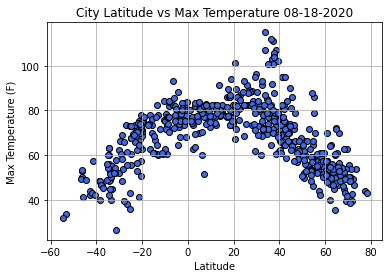

In [12]:
# Defining date variable, so date in chart updates to the date of the URL call
date = city_weather.loc[1,'Date']

plt.grid()
plt.scatter(city_weather_no_null['Lat'], city_weather_no_null['Max Temp'], facecolors="royalblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature {date}")
plt.savefig('lat_temp_all.png')

Temperatures tend to be higher the closer the city is to the equator.

## Latitude vs. Humidity Plot

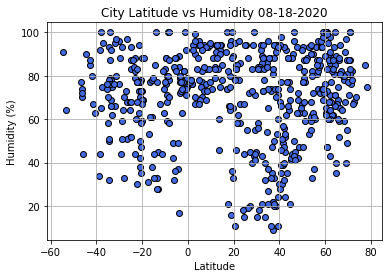

In [13]:
date = city_weather.loc[1,'Date']
plt.grid()
plt.scatter(city_weather_no_null['Lat'], city_weather_no_null['Humidity'], facecolors="royalblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity {date}")
plt.savefig('lat_hum_all.png')

Humidity was high for the majority of the cities queried regardless of latitude.

## Latitude vs. Cloudiness Plot

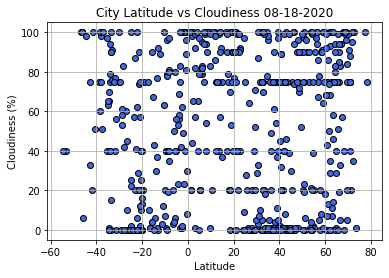

In [14]:
date = city_weather.loc[1,'Date']
plt.grid()
plt.scatter(city_weather_no_null['Lat'], city_weather_no_null['Cloudiness'], facecolors="royalblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness {date}")
plt.savefig('lat_cloud_all.png')

While the correlation between cloudiness and latitude was low, there seemed to be some clustering from this data call snapshot in time.

## Latitude vs. Wind Speed Plot

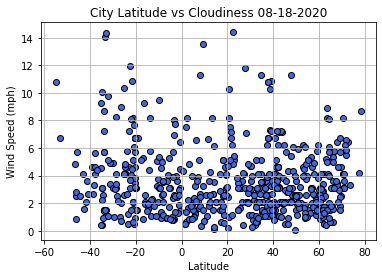

In [15]:
date = city_weather.loc[1,'Date']
plt.grid()
plt.scatter(city_weather_no_null['Lat'], city_weather_no_null['Wind Speed'], facecolors="royalblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Cloudiness {date}")
plt.savefig('lat_wind_all.png')

Across the globe, wind speed was generally lower than 8 mph.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R Val is 0.4699692798846455


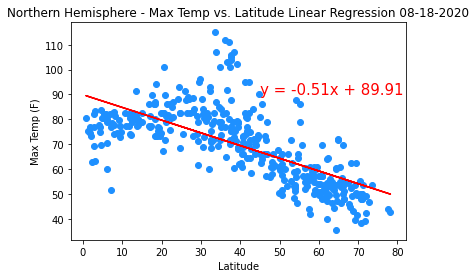

In [16]:
# Defining date variable, so date in chart updates to the date of the URL call
date = city_weather.loc[1,'Date']

north_hem = city_weather_no_null.loc[city_weather_no_null['Lat'] > 0,]

#plotting and formatting scatter
plt.scatter(north_hem['Lat'], north_hem['Max Temp'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression {date}")

#defining values
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(45,90),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
plt.savefig('north_temp.png')

There was a moderate correlation (R-Value around .46) between Northern Max Temp and Latitude.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R Val is 0.6432060117654602


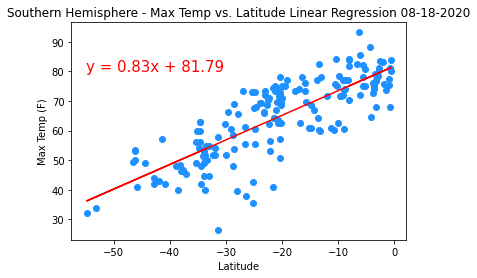

In [17]:
# Defining date variable, so date in chart updates to the date of the URL call
date = city_weather.loc[1,'Date']

south_hem = city_weather_no_null.loc[city_weather_no_null['Lat'] < 0,]

#plotting and formatting scatter
plt.scatter(south_hem['Lat'], south_hem['Max Temp'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression {date}")

#defining values
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(-55,80),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
plt.savefig('south_temp.png')

There was a moderate to strong correlation between Southern Max Temp and Latitude.

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Val is 8.681702321063366e-05


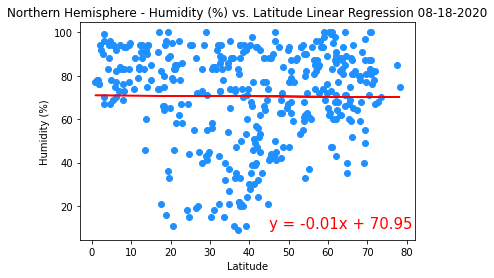

In [18]:
date = city_weather.loc[1,'Date']

north_hem = city_weather_no_null.loc[city_weather_no_null['Lat'] > 0,]

#plotting and formatting scatter
plt.scatter(north_hem['Lat'], north_hem['Humidity'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression {date}")

#defining values
x_values = north_hem['Lat']
y_values = north_hem['Humidity']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(45,10),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
plt.savefig('north_hum.png')

There was very little to practically no correlation between Northern humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Val is 0.002079191370750113


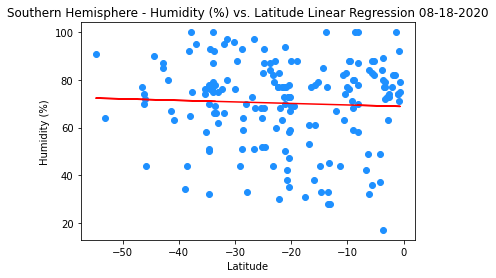

In [19]:
date = city_weather.loc[1,'Date']

south_hem = city_weather_no_null.loc[city_weather_no_null['Lat'] < 0,]

#plotting and formatting scatter
plt.scatter(south_hem['Lat'], south_hem['Humidity'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression {date}")

#defining values
x_values = south_hem['Lat']
y_values = south_hem['Humidity']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(-55,11),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
plt.savefig('south_hum.png')

There was very little to practically no correlation between Southern humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Val is 0.00152053551239976


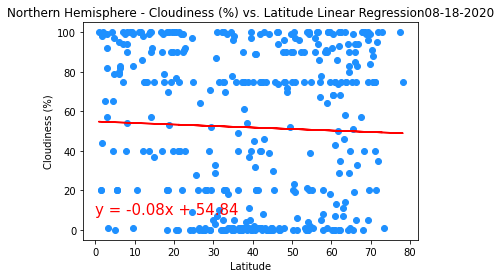

In [20]:
date = city_weather.loc[1,'Date']

north_hem = city_weather_no_null.loc[city_weather_no_null['Lat'] > 0,]

#plotting and formatting scatter
plt.scatter(north_hem['Lat'], north_hem['Cloudiness'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression{date}")

#defining values
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(0,8),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
plt.savefig('north_cloud.png')

There is very little to practically no correlation (.0015 R-Value) between Northern cloudiness and latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Val is 0.015364801746159782


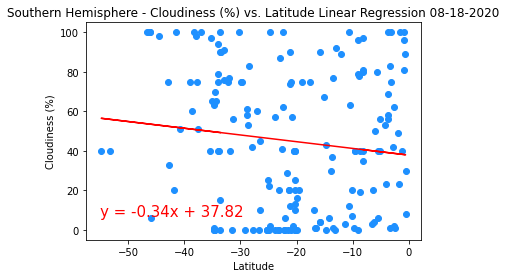

In [21]:
date = city_weather.loc[1,'Date']

south_hem = city_weather_no_null.loc[city_weather_no_null['Lat'] < 0,]

#plotting and formatting scatter
plt.scatter(south_hem['Lat'], south_hem['Cloudiness'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {date}")

#defining values
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(-55,7),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
plt.savefig('south_cloud.png')

There is very little correlation (.019 R-Value) between Southern cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Val is 0.002941877844999541


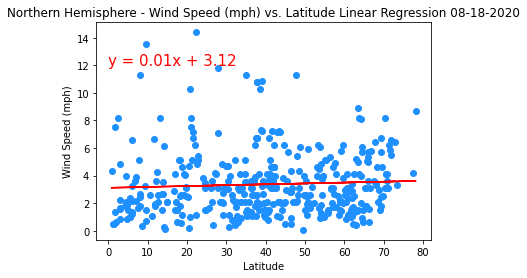

In [22]:
date = city_weather.loc[1,'Date']

north_hem = city_weather_no_null.loc[city_weather_no_null['Lat'] > 0,]

#plotting and formatting scatter
plt.scatter(north_hem['Lat'], north_hem['Wind Speed'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression {date}")

#defining values
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(0,12),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
plt.savefig('north_wind.png')

There is very little correlation between Northern wind speed and latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Val is 0.027315738427786763


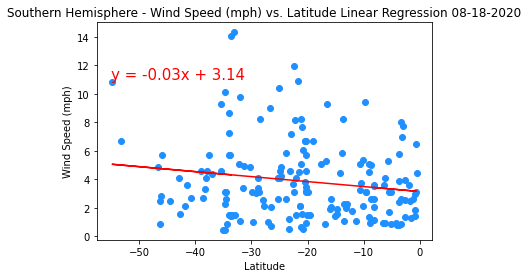

In [23]:
date = city_weather.loc[1,'Date']

south_hem = city_weather_no_null.loc[city_weather_no_null['Lat'] < 0,]

#plotting and formatting scatter
plt.scatter(south_hem['Lat'], south_hem['Wind Speed'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression {date}")

#defining values
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(-55,11),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing
plt.savefig('south_wind.png')

There is low correlation between Southern wind speed and latitude.